In [162]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

train = pd.read_csv('X_train.csv',delimiter=",")
test = pd.read_csv('y_train.csv', delimiter=",")

test2=pd.read_csv('X_test.csv',delimiter=",")

target = 'EpiOrStroma'
IDcol = 'ID'


In [163]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    
    test['EpiOrStroma'] = np.where(test['EpiOrStroma'] == 2,1,0)
    alg.fit(dtrain[predictors], test['EpiOrStroma'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    
    print (test)

    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], test['EpiOrStroma'], cv=cv_folds, scoring='roc_auc')
    
    print(dtrain_predictions)
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(test['EpiOrStroma'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(test['EpiOrStroma'], dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

      Id  EpiOrStroma
0      0            0
1      1            0
2      2            0
3      3            0
4      4            1
5      5            1
6      6            1
7      7            1
8      8            1
9      9            1
10    10            1
11    11            1
12    12            1
13    13            1
14    14            1
15    15            1
16    16            1
17    17            1
18    18            1
19    19            1
20    20            1
21    21            1
22    22            1
23    23            1
24    24            1
25    25            1
26    26            1
27    27            1
28    28            1
29    29            1
..   ...          ...
570  570            1
571  571            1
572  572            1
573  573            1
574  574            1
575  575            1
576  576            1
577  577            1
578  578            1
579  579            1
580  580            1
581  581            1
582  582            1
583  583  

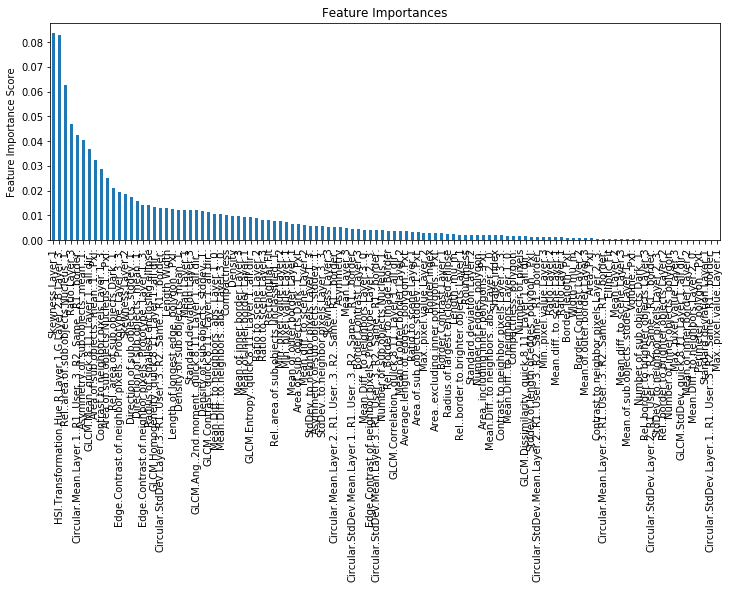

In [164]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, train, predictors)

In [165]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
param_test1 = {'n_estimators':list(range(20,81,10))}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=7,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],test[target])
resulttest=gsearch1.predict(test2[predictors])

a= [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1]
for n, i in enumerate(resulttest):
    if i == 1:
        resulttest[n] = 2.
    if i == 0:
        resulttest[n]=1.

print(resulttest)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

[2 1 2 ..., 2 2 2]


([mean: 0.96543, std: 0.01303, params: {'n_estimators': 20},
  mean: 0.96702, std: 0.01317, params: {'n_estimators': 30},
  mean: 0.96852, std: 0.01160, params: {'n_estimators': 40},
  mean: 0.96731, std: 0.01157, params: {'n_estimators': 50},
  mean: 0.96792, std: 0.01158, params: {'n_estimators': 60},
  mean: 0.96863, std: 0.01124, params: {'n_estimators': 70},
  mean: 0.96800, std: 0.01257, params: {'n_estimators': 80}],
 {'n_estimators': 70},
 0.9686310962877114)

In [166]:
test_header = "Id,EpiOrStroma"
print (resulttest.shape)
n_points = test2.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = range(n_points)
y_pred_pp[:, 1] = resulttest[:]

print (y_pred_pp)
np.savetxt('classificationSub.csv', y_pred_pp, fmt='%d', delimiter=",",
           header=test_header, comments="")

(1596,)
[[  0.00000000e+00   2.00000000e+00]
 [  1.00000000e+00   1.00000000e+00]
 [  2.00000000e+00   2.00000000e+00]
 ..., 
 [  1.59300000e+03   2.00000000e+00]
 [  1.59400000e+03   2.00000000e+00]
 [  1.59500000e+03   2.00000000e+00]]
